In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train = pd.read_csv('/content/drive/MyDrive/데이터셋/card/train.csv')
test = pd.read_csv('/content/drive/MyDrive/데이터셋/card/test.csv')
sub = pd.read_csv('/content/drive/MyDrive/데이터셋/card/sample_submission.csv')

train.shape, test.shape, sub.shape

((26457, 20), (10000, 19), (10000, 4))

In [ ]:
train['credit'].value_counts()

2.0    16968
1.0     6267
0.0     3222
Name: credit, dtype: int64

In [4]:
train = train.drop(['index'], axis=1)
test = test.drop(['index'], axis=1)
train.shape, test.shape

((26457, 19), (10000, 18))

In [5]:
df = pd.concat([train, test], axis=0)
print(df.shape)
df.head()

(36457, 19)


,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


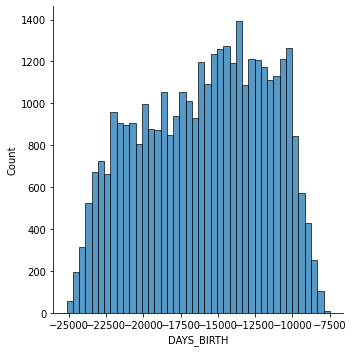

In [ ]:
sns.displot(data=df['DAYS_BIRTH'])

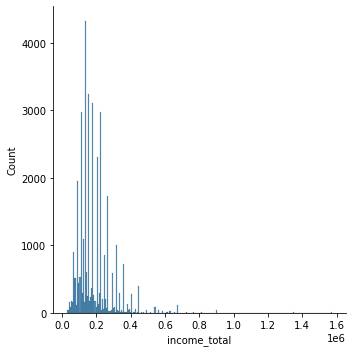

In [ ]:
sns.displot(data=df['income_total'])

In [ ]:
df_a = df[df['DAYS_EMPLOYED'] > 0]

In [ ]:
df['DAYS_EMPLOYED'].value_counts(ascending=False)

 0       6135
-401       78
-1539      64
-200       63
-2087      61
         ... 
-4092       1
-3351       1
-3146       1
-2932       1
-616        1
Name: DAYS_EMPLOYED, Length: 3640, dtype: int64

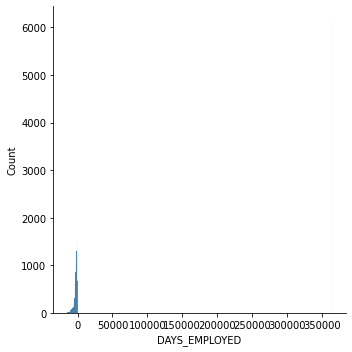

In [ ]:
sns.displot(data=df['DAYS_EMPLOYED'])

In [ ]:
df['credit'].value_counts()

2.0    16968
1.0     6267
0.0     3222
Name: credit, dtype: int64

In [ ]:
df2=df

<Figure size 1440x1440 with 0 Axes>

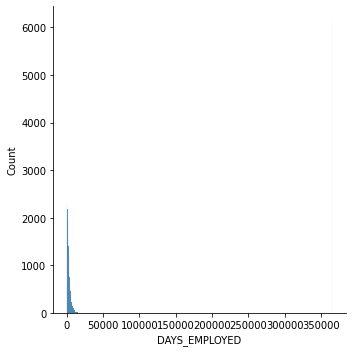

In [ ]:
plt.figure(figsize=(20,20))
sns.displot(data=df2['DAYS_EMPLOYED'])

In [ ]:
df2['DAYS_EMPLOYED'] = abs(df['DAYS_EMPLOYED'])

In [ ]:
df.isna().sum()

gender               0
car                  0
reality              0
child_num            0
income_total         0
income_type          0
edu_type             0
family_type          0
house_type           0
DAYS_BIRTH           0
DAYS_EMPLOYED        0
FLAG_MOBIL           0
work_phone           0
phone                0
email                0
occyp_type       11323
family_size          0
begin_month          0
credit           10000
dtype: int64

# 전처리

In [6]:
df['occyp_type'].fillna('NaN', inplace=True)

In [7]:
df.loc[(df['DAYS_EMPLOYED'] > 0), 'DAYS_EMPLOYED'] = 0

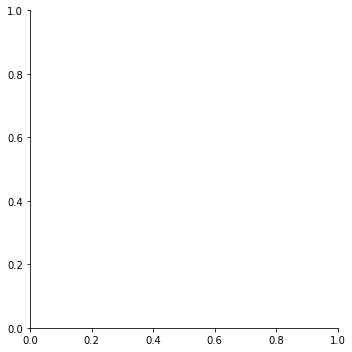

In [ ]:
sns.displot(df=df['DAYS_EMPLOYED'])

In [8]:
df['DAYS_BIRTH'] = abs(df['DAYS_BIRTH'])

In [9]:
df['DAYS_EMPLOYED'] = abs(df['DAYS_EMPLOYED'])

In [10]:
df['begin_month'] = abs(df['begin_month'])

In [11]:
df['begin_month'].value_counts()

7.0     889
11.0    828
6.0     824
8.0     820
5.0     816
       ... 
58.0    333
60.0    321
0.0     315
59.0    307
57.0    304
Name: begin_month, Length: 61, dtype: int64

In [12]:
df['gender'] = df['gender'].replace(['F','M'],[0,1])
df['car'] = df['car'].replace(['N','Y'],[0,1])
df['reality'] = df['reality'].replace(['N','Y'],[0,1])

In [13]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['income_type']=label_encoder.fit_transform(df['income_type'])
df['edu_type']=label_encoder.fit_transform(df['edu_type'])
df['family_type']=label_encoder.fit_transform(df['family_type'])
df['house_type']=label_encoder.fit_transform(df['house_type'])
df['occyp_type']=label_encoder.fit_transform(df['occyp_type'])

In [ ]:
corr = df.corr()
corr

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
gender,1.000000,0.361379,-0.050758,0.077690,0.197805,0.105639,0.005880,-0.099289,0.070301,-0.202352,-0.031731,0.064994,-0.026833,-0.003284,-0.130181,0.110782,-0.005079,0.001562
car,0.361379,1.000000,-0.015185,0.105839,0.215506,0.054817,-0.101272,-0.121716,0.016337,-0.157144,0.006244,0.021644,-0.014019,0.021750,-0.119776,0.151814,0.029627,0.007761
reality,-0.050758,-0.015185,1.000000,-0.000575,0.032719,-0.046543,0.010997,0.022993,-0.179187,0.129838,-0.033646,-0.207732,-0.066601,0.052194,0.048800,-0.005723,-0.006476,-0.009387
child_num,0.077690,0.105839,-0.000575,1.000000,0.033691,0.109401,-0.049823,-0.160386,0.023302,-0.339357,0.043358,0.048091,-0.016291,0.015960,-0.134796,0.889114,0.003984,0.004081
income_total,0.197805,0.215506,0.032719,0.033691,1.000000,-0.072974,-0.226931,-0.001191,-0.006480,-0.067908,0.087130,-0.037746,0.017245,0.086681,-0.091777,0.023750,0.017494,0.008555
income_type,0.105639,0.054817,-0.046543,0.109401,-0.072974,1.000000,0.057225,-0.048532,0.035694,-0.213509,0.192949,0.165785,0.006529,-0.019567,-0.204559,0.109313,0.000846,-0.008163
edu_type,0.005880,-0.101272,0.010997,-0.049823,-0.226931,0.057225,1.000000,0.007747,-0.036322,0.169024,-0.016347,-0.021092,-0.044875,-0.098457,0.081714,-0.041344,-0.014839,0.013780
family_type,-0.099289,-0.121716,0.022993,-0.160386,-0.001191,-0.048532,0.007747,1.000000,0.010025,0.106486,-0.049974,-0.063103,-0.015065,-0.010895,0.055781,-0.546511,-0.030053,-0.005230
house_type,0.070301,0.016337,-0.179187,0.023302,-0.006480,0.035694,-0.036322,0.010025,1.000000,-0.211562,-0.021771,0.030080,-0.020254,0.012879,-0.065115,0.003805,-0.030031,-0.009023
DAYS_BIRTH,-0.202352,-0.157144,0.129838,-0.339357,-0.067908,-0.213509,0.169024,0.106486,-0.211562,1.000000,-0.023497,-0.179054,0.028659,-0.105625,0.329082,-0.304020,0.053913,0.025187


In [14]:
df = df.drop(columns='FLAG_MOBIL')

In [ ]:
df.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,0,0,0,0,202500.0,0,1,1,2,13899,4709,0,0,0,12,2.0,6.0,1.0
1,1,0,0,1,1,247500.0,0,4,0,1,11380,1540,0,0,1,8,3.0,5.0,1.0
2,2,1,1,1,0,450000.0,4,1,1,1,19087,4434,0,1,0,10,2.0,22.0,2.0
3,3,0,0,1,0,202500.0,0,4,1,1,15088,2092,0,1,0,15,2.0,37.0,0.0
4,4,0,1,1,0,157500.0,2,1,1,1,15037,2105,0,0,0,10,2.0,26.0,2.0


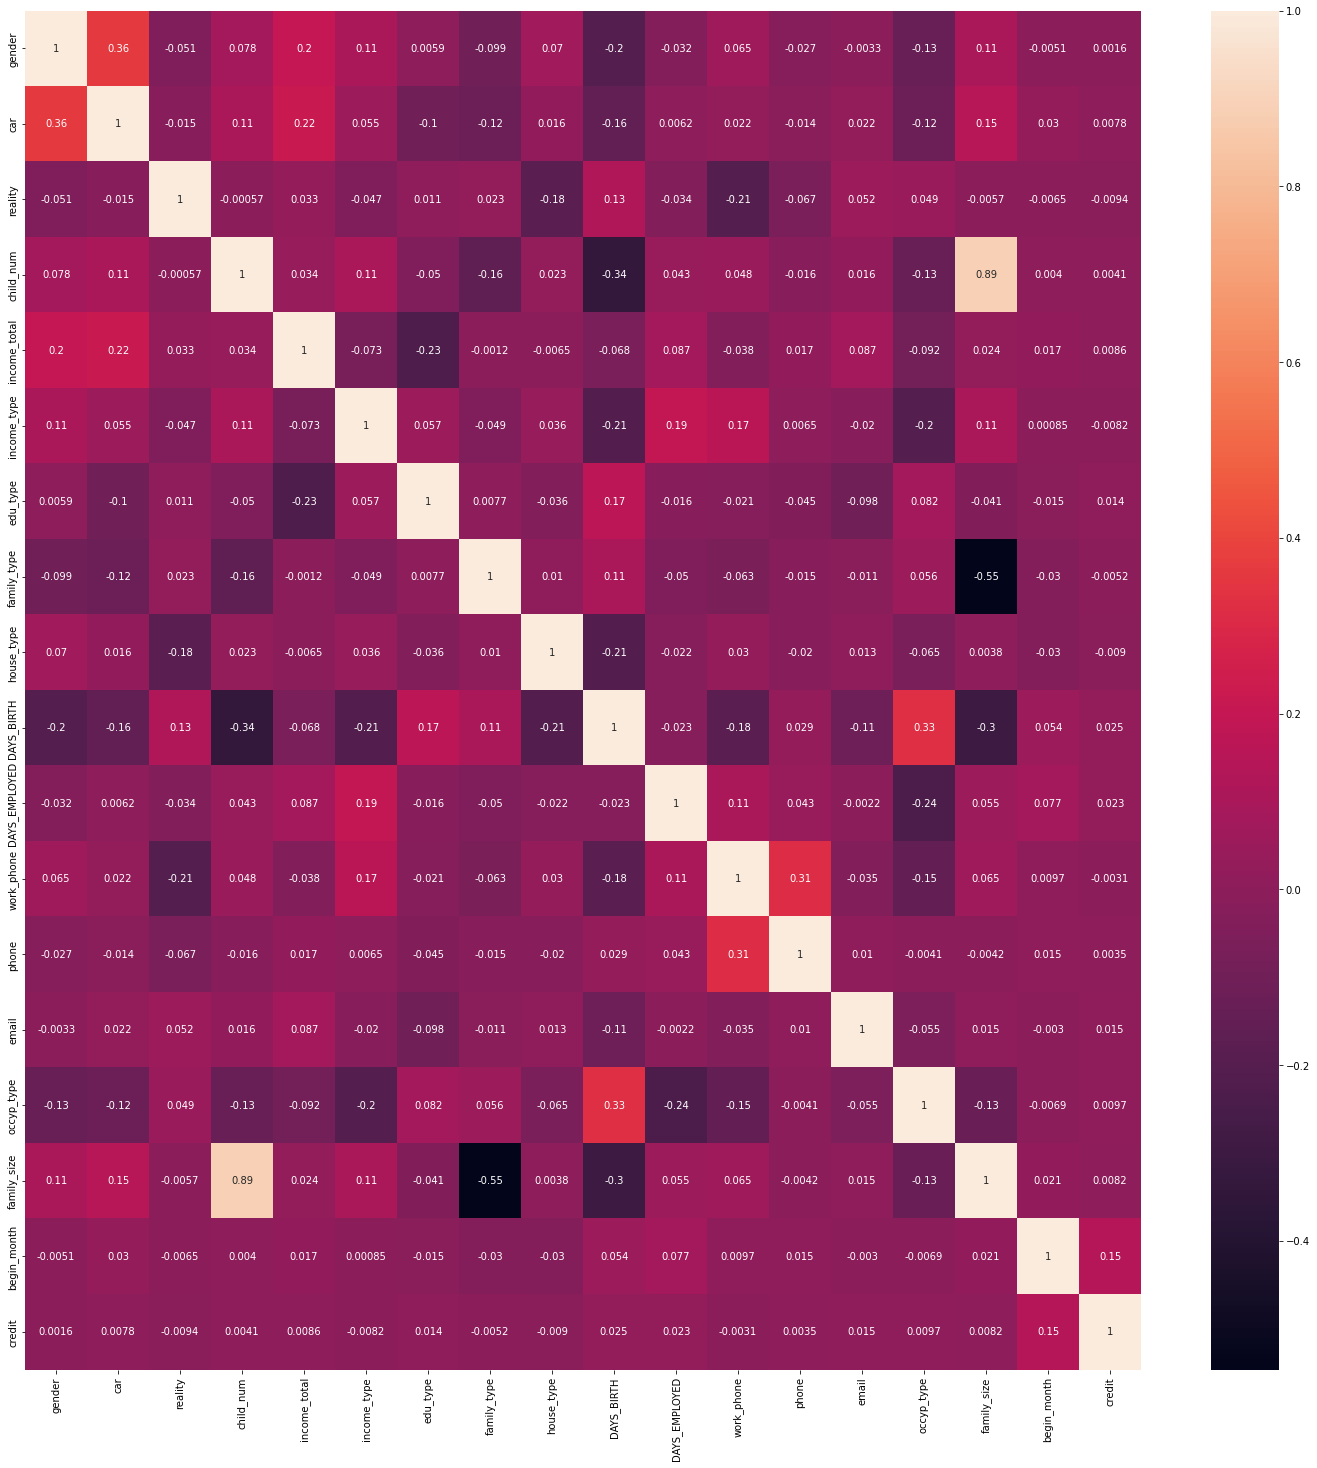

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(data=corr, annot=True)

In [15]:
train=df[:len(df)-10000]
test=df[len(df)-10000:]

In [16]:
X_train=train.drop('credit', axis=1)
y_train=train[['credit']]
X_test=test.drop('credit', axis=1)

X_train.shape, y_train.shape, X_test.shape

((26457, 17), (26457, 1), (10000, 17))

# 모델구성

In [17]:
X_train.shape, y_train.shape

((26457, 17), (26457, 1))

In [18]:
X_train.columns

Index(['gender', 'car', 'reality', 'child_num', 'income_total', 'income_type',
       'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'work_phone', 'phone', 'email', 'occyp_type', 'family_size',
       'begin_month'],
      dtype='object')

In [37]:
input_shape = X_train.shape[1]

input_shape

17

In [41]:
from keras.layers import Dense
from keras.models import Sequential
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(128, input_dim=17, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(3))

In [42]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               2304      
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 3)                 387       
                                                                 
Total params: 19,203
Trainable params: 19,203
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
827/827 [==============================] - 2s 2ms/step - loss: 677.2648 - accuracy: 0.4841
Epoch 2/20
827/827 [==============================] - 1s 2ms/step - loss: 419.5439 - accuracy: 0.4900
Epoch 3/20
827/827 [==============================] - 1s 2ms/step - loss: 345.5721 - accuracy: 0.4857
Epoch 4/20
827/827 [==============================] - 1s 2ms/step - loss: 253.3759 - accuracy: 0.4891
Epoch 5/20
827/827 [==============================] - 1s 2ms/step - loss: 230.4554 - accuracy: 0.4915
Epoch 6/20
827/827 [==============================] - 1s 2ms/step - loss: 204.0398 - accuracy: 0.4899
Epoch 7/20
827/827 [==============================] - 2s 2ms/step - loss: 173.2696 - accuracy: 0.4902
Epoch 8/20
827/827 [==============================] - 2s 2ms/step - loss: 116.5320 - accuracy: 0.4923
Epoch 9/20
827/827 [==============================] - 2s 2ms/step - loss: 95.2361 - accuracy: 0.4931
Epoch 10/20
827/827 [==============================] - 1s 2ms/step - loss: 73.7693 

In [47]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(X_test)
predictions

313/313 [==============================] - 1s 1ms/step


array([[0.06469409, 0.18500802, 0.7502979 ],
       [0.06398376, 0.18407546, 0.75194085],
       [0.08265481, 0.20645738, 0.71088785],
       ...,
       [0.14255604, 0.25763935, 0.5998046 ],
       [0.17583999, 0.27718765, 0.54697233],
       [0.19626212, 0.28691363, 0.5168242 ]], dtype=float32)

In [24]:
model.predict(X_test)

313/313 [==============================] - 0s 950us/step


array([[0.1288254 , 0.23768051, 0.6334942 ],
       [0.1288254 , 0.23768051, 0.6334942 ],
       [0.1288254 , 0.23768051, 0.6334942 ],
       ...,
       [0.1288254 , 0.23768051, 0.6334942 ],
       [0.1288254 , 0.23768051, 0.6334942 ],
       [0.1288254 , 0.23768051, 0.6334942 ]], dtype=float32)

In [55]:
print(predictions.shape)

(10000, 3)


In [56]:
predictions

array([[0.06469409, 0.18500802, 0.7502979 ],
       [0.06398376, 0.18407546, 0.75194085],
       [0.08265481, 0.20645738, 0.71088785],
       ...,
       [0.14255604, 0.25763935, 0.5998046 ],
       [0.17583999, 0.27718765, 0.54697233],
       [0.19626212, 0.28691363, 0.5168242 ]], dtype=float32)

In [60]:
predictions[0][1]

0.18500802

In [63]:
i, j, k = [], [], []
for row in range(10000):
  i.append(predictions[row][0])
  j.append(predictions[row][1])
  k.append(predictions[row][2])

len(i), len(j), len(k)

(10000, 10000, 10000)

In [65]:
sub

,index,0,1,2
0,26457,0.064694,0.185008,0.750298
1,26458,0.063984,0.184075,0.751941
2,26459,0.082655,0.206457,0.710888
3,26460,0.068289,0.189621,0.742090
4,26461,0.141383,0.256855,0.601761
...,...,...,...,...
9995,36452,0.143303,0.258135,0.598563
9996,36453,0.196262,0.286914,0.516824
9997,36454,0.142556,0.257639,0.599805
9998,36455,0.175840,0.277188,0.546972


In [87]:
sample_submission = pd.read_csv('/content/drive/MyDrive/데이터셋/card/sample_submission.csv')
sample_submission

,index,0,1,2
0,26457,0,0,0
1,26458,0,0,0
2,26459,0,0,0
3,26460,0,0,0
4,26461,0,0,0
...,...,...,...,...
9995,36452,0,0,0
9996,36453,0,0,0
9997,36454,0,0,0
9998,36455,0,0,0


In [84]:
sub['0'] = i
sub['1'] = j
sub['2'] = k
sub.head(10)

,index,0,1,2
0,26457,0.064694,0.185008,0.750298
1,26458,0.063984,0.184075,0.751941
2,26459,0.082655,0.206457,0.710888
3,26460,0.068289,0.189621,0.742090
4,26461,0.141383,0.256855,0.601761
5,26462,0.092454,0.216694,0.690852
6,26463,0.196262,0.286914,0.516824
7,26464,0.101783,0.225647,0.672570
8,26465,0.156801,0.266619,0.576580
9,26466,0.164777,0.271236,0.563987


In [86]:
sub

,index,0,1,2
0,26457,0.064694,0.185008,0.750298
1,26458,0.063984,0.184075,0.751941
2,26459,0.082655,0.206457,0.710888
3,26460,0.068289,0.189621,0.742090
4,26461,0.141383,0.256855,0.601761
...,...,...,...,...
9995,36452,0.143303,0.258135,0.598563
9996,36453,0.196262,0.286914,0.516824
9997,36454,0.142556,0.257639,0.599805
9998,36455,0.175840,0.277188,0.546972


In [89]:
sub.to_csv('3.csv', index=False)